In [201]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt      
from sklearn.decomposition import PCA
from scipy.stats import *
import numpy as np
import sklearn
import seaborn as sns
from __future__ import division
%matplotlib inline

In [2]:
full_df = pd.read_csv("final_df.csv")
full_df

,name,developer,publisher,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments,score
0,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,5382473,722938,75000000.0,30578,7329,0,20055366,426246,45340,80.666667
1,Dota 2,Valve,Valve,1377514,267155,150000000.0,36994,1118,0,11063025,77961,22805,90.000000
2,Grand Theft Auto V,Rockstar North,Rockstar Games,1064898,202052,35000000.0,13027,5973,1480,79933514,1591274,326264,96.800000
3,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1037820,844274,35000000.0,26778,11760,2999,643933,3160,173,18.649284
4,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,884943,128398,35000000.0,13964,2646,799,2716326,21901,902,75.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,Tactical Vanguard Saga,Blacc Ski Weekend Industries,Blacc Ski Weekend Industries,0,2,150000.0,0,0,499,78,3,1,0.000000
4789,Sabre Team,Krisalis Software,Ziggurat,0,1,3500000.0,0,0,454,284,12,0,0.000000
4790,ESCAPE FROM VOYNA: Dead Forest,Dead Turtle,Dead Turtle,0,1,750000.0,0,0,467,23402,830,111,0.000000
4791,RACE On,SimBin,SimBin,0,0,150000.0,1,1,399,1949619,14513,1178,73.000000


In [31]:
# game defined as successful if score >= 75
is_successful = [1 if i>=75 else 0 for i in full_df.score]

In [33]:
full_df['is_successful'] = is_successful

In [120]:
full_df.to_csv("final_df.csv", index=False)

,name,developer,publisher,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments,score,is_successful
0,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,5382473,722938,75000000.0,30578,7329,0,20055366,426246,45340,80.666667,1
1,Dota 2,Valve,Valve,1377514,267155,150000000.0,36994,1118,0,11063025,77961,22805,90.000000,1
2,Grand Theft Auto V,Rockstar North,Rockstar Games,1064898,202052,35000000.0,13027,5973,1480,79933514,1591274,326264,96.800000,1
3,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1037820,844274,35000000.0,26778,11760,2999,643933,3160,173,18.649284,0
4,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,884943,128398,35000000.0,13964,2646,799,2716326,21901,902,75.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,Tactical Vanguard Saga,Blacc Ski Weekend Industries,Blacc Ski Weekend Industries,0,2,150000.0,0,0,499,78,3,1,0.000000,0
4789,Sabre Team,Krisalis Software,Ziggurat,0,1,3500000.0,0,0,454,284,12,0,0.000000,0
4790,ESCAPE FROM VOYNA: Dead Forest,Dead Turtle,Dead Turtle,0,1,750000.0,0,0,467,23402,830,111,0.000000,0
4791,RACE On,SimBin,SimBin,0,0,150000.0,1,1,399,1949619,14513,1178,73.000000,0


In [133]:
full_df.info() # publisher --> 10 NaN values, developer --> 25 NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4793 non-null   object 
 1   developer        4768 non-null   object 
 2   publisher        4783 non-null   object 
 3   positive         4793 non-null   int64  
 4   negative         4793 non-null   int64  
 5   owners_approx    4793 non-null   float64
 6   average_forever  4793 non-null   int64  
 7   median_forever   4793 non-null   int64  
 8   price            4793 non-null   int64  
 9   yt_views         4793 non-null   int64  
 10  yt_likes         4793 non-null   int64  
 11  yt_comments      4793 non-null   int64  
 12  score            4793 non-null   float64
 13  is_successful    4793 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 524.4+ KB


In [149]:
# copying publisher value to developer value where developer = NaN (lets us keep more rows in the df)

for indx, row in full_df.iterrows():
    dev_name = row.iloc[1]
    pub_name = row.iloc[2]
    
    if dev_name is np.nan:
        full_df.at[indx, 'developer'] = pub_name
    if pub_name is np.nan:
        full_df.at[indx, 'publisher'] = dev_name

In [152]:
full_df.info() # --> no more NaN values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4793 non-null   object 
 1   developer        4793 non-null   object 
 2   publisher        4793 non-null   object 
 3   positive         4793 non-null   int64  
 4   negative         4793 non-null   int64  
 5   owners_approx    4793 non-null   float64
 6   average_forever  4793 non-null   int64  
 7   median_forever   4793 non-null   int64  
 8   price            4793 non-null   int64  
 9   yt_views         4793 non-null   int64  
 10  yt_likes         4793 non-null   int64  
 11  yt_comments      4793 non-null   int64  
 12  score            4793 non-null   float64
 13  is_successful    4793 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 524.4+ KB


In [154]:
full_df.to_csv("final_df.csv", index=False)

In [158]:
#chekcpoint
full_df.describe(include='all')

,name,developer,publisher,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments,score,is_successful
count,4793,4793,4793,4.793000e+03,4793.00000,4.793000e+03,4793.000000,4793.000000,4793.000000,4.793000e+03,4.793000e+03,4793.000000,4793.000000,4793.000000
unique,4793,3226,2360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Isles of Limbo,Valve,Ubisoft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,30,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.312021e+04,2077.34154,1.078990e+06,837.843939,647.284790,521.404131,1.141847e+06,1.182158e+04,1419.773211,69.929161,0.530983
std,NaN,NaN,NaN,9.347627e+04,17722.97231,3.741258e+06,3042.006374,4858.833674,766.004812,5.274437e+06,7.034727e+04,14341.236347,22.518777,0.499091
min,NaN,NaN,NaN,0.000000e+00,0.00000,1.500000e+05,0.000000,0.000000,0.000000,2.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,6.970000e+02,166.00000,3.500000e+05,118.000000,86.000000,0.000000,1.283700e+04,6.600000e+01,6.000000,62.000000,0.000000
50%,NaN,NaN,NaN,2.218000e+03,399.00000,3.500000e+05,270.000000,228.000000,249.000000,8.178000e+04,5.210000e+02,58.000000,76.000000,1.000000
75%,NaN,NaN,NaN,6.334000e+03,1122.00000,7.500000e+05,690.000000,454.000000,739.000000,3.830840e+05,3.109000e+03,332.000000,85.805109,1.000000


In [208]:
# converting 'price' column from int to float and setting the values as $ instead of cents

full_df['price'] = full_df['price'].astype(float)
i = 8
for indx, row in full_df.iterrows():
    full_df.at[indx, 'price'] = row.iloc[i]/float(100)
full_df

,name,developer,publisher,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments,score,is_successful
0,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,5382473,722938,75000000.0,30578,7329,0.00,20055366,426246,45340,80.666667,1
1,Dota 2,Valve,Valve,1377514,267155,150000000.0,36994,1118,0.00,11063025,77961,22805,90.000000,1
2,Grand Theft Auto V,Rockstar North,Rockstar Games,1064898,202052,35000000.0,13027,5973,14.80,79933514,1591274,326264,96.800000,1
3,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1037820,844274,35000000.0,26778,11760,29.99,643933,3160,173,18.649284,0
4,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,884943,128398,35000000.0,13964,2646,7.99,2716326,21901,902,75.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,Tactical Vanguard Saga,Blacc Ski Weekend Industries,Blacc Ski Weekend Industries,0,2,150000.0,0,0,4.99,78,3,1,0.000000,0
4789,Sabre Team,Krisalis Software,Ziggurat,0,1,3500000.0,0,0,4.54,284,12,0,0.000000,0
4790,ESCAPE FROM VOYNA: Dead Forest,Dead Turtle,Dead Turtle,0,1,750000.0,0,0,4.67,23402,830,111,0.000000,0
4791,RACE On,SimBin,SimBin,0,0,150000.0,1,1,3.99,1949619,14513,1178,73.000000,0


In [234]:
# CHECKPOINT
full_df.to_csv("final_df.csv", index=False)

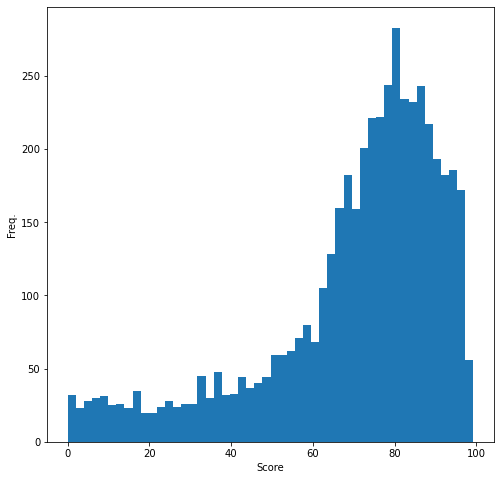

In [188]:
plt.figure(figsize=(8,8))
plt.hist(full_df.score, bins=50)
plt.ylabel("Freq.")
plt.xlabel("Score")
plt.show()

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

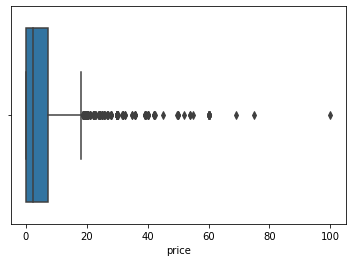

In [216]:
sns.boxplot(full_df.price)

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

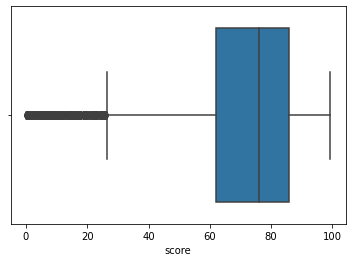

In [218]:
sns.boxplot(full_df.score)

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_forever'>

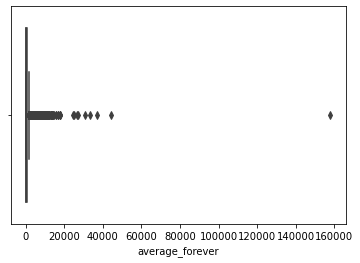

In [219]:
sns.boxplot(full_df.average_forever)

In [223]:
full_df[full_df['price']<20].count()

name               4629
developer          4629
publisher          4629
positive           4629
negative           4629
owners_approx      4629
average_forever    4629
median_forever     4629
price              4629
yt_views           4629
yt_likes           4629
yt_comments        4629
score              4629
is_successful      4629
dtype: int64

In [212]:
Q1 = np.percentile(full_df["price"], 25)
Q3 = np.percentile(full_df["price"], 75)
IQR = Q3 - Q1

In [213]:
IQR

7.39

In [215]:
price_outlier_rows = full_df[(full_df["price"] < Q1 - 1.5*IQR) | (full_df["price"] > Q3 + 1.5*IQR )].index
price_outlier_rows

Int64Index([   3,    8,   23,   29,   30,   39,   40,   48,   50,   53,
            ...
            3861, 3897, 4009, 4069, 4190, 4247, 4495, 4715, 4741, 4784],
           dtype='int64', length=291)